In [1]:
import sys
import pandas as pd
import numpy as np
import importlib.resources as pkg_resources
sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from textrove import Documents, Sentiment, Summary, DynTM

In [3]:
df_imdb = pd.read_csv('../data/IMDB Dataset - Small.csv')
print("Columns in Data: '{0}', '{1}'.".format(df_imdb.columns[0], df_imdb.columns[1]))
print("Data has {0} rows & {1} columns".format(df_imdb.shape[0], df_imdb.shape[1]))

Columns in Data: 'review', 'sentiment'.
Data has 1000 rows & 2 columns


# Exploratory Data Analysis

In [4]:
doc_obj = Documents(data_frame=df_imdb, text_column='review')
df_imdb_clean = doc_obj.prep_docs(return_df=True)
df_imdb_clean.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode hook eactly ...
1,A wonderful little production. <br /><br />The...,positive,wonderful production film technique unassuming...
2,I thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sit ai...
3,Basically there's a family where a little boy ...,negative,basically family boy jake zombie closet parent...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [5]:
doc_obj.explore()

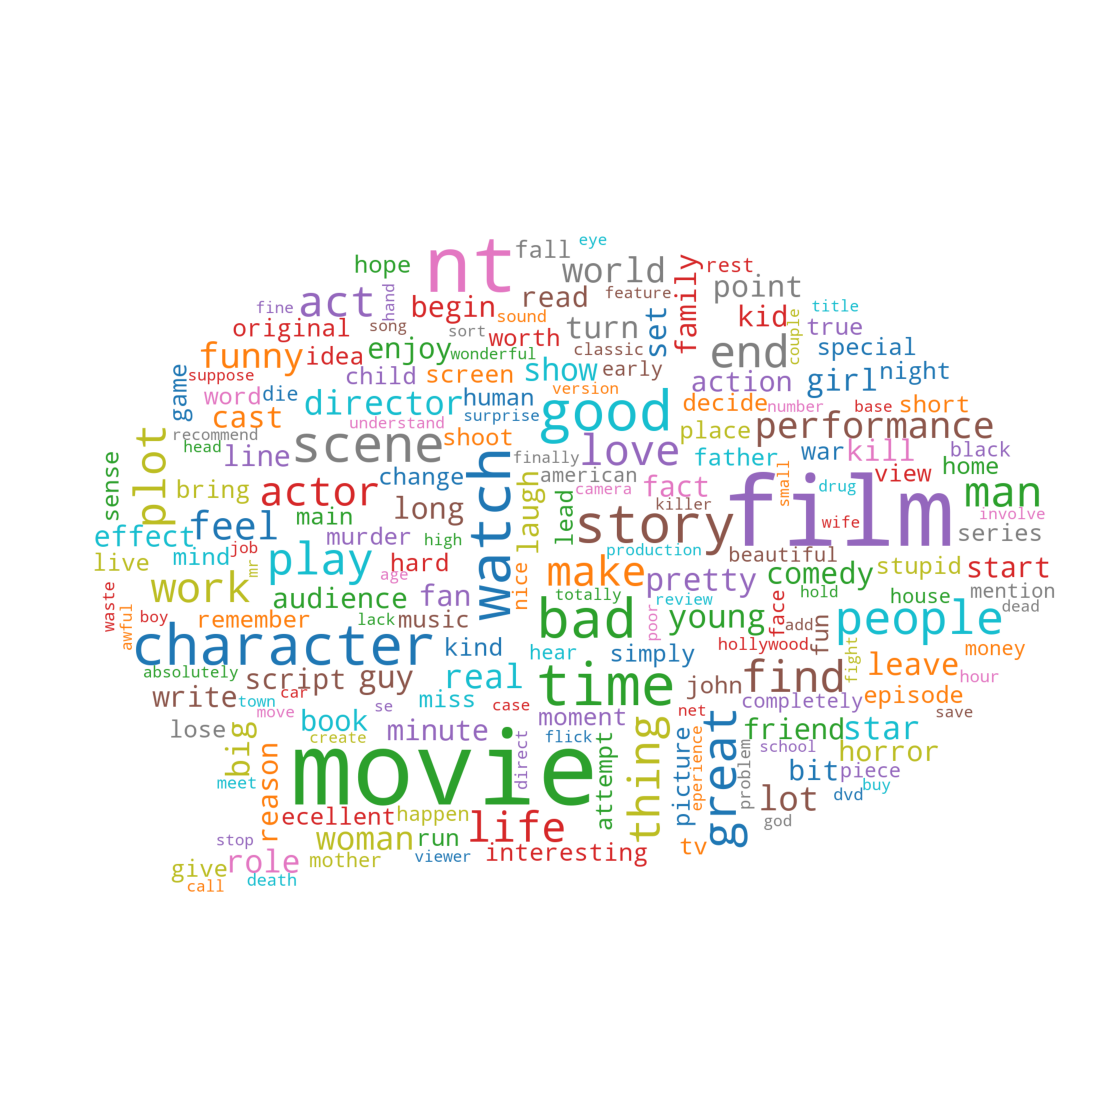

In [6]:
doc_obj.create_wordcloud()

# Sentiment Analysis

In [7]:
sent_obj = Sentiment(documents_object=doc_obj, method='lexical', lexicon='loughran')
sent_obj.plot_sentiment()

In [8]:
sent_obj.plot_sentiment(X_variable='sentiment')

In [9]:
sent_obj.plot_word_sentiment(X_variable='sentiment')

# Summarization and Keyword Tagging

In [10]:
summ_obj = Summary(documents_object=doc_obj, method='all')
result = summ_obj.generate_results()

In [11]:
result.head()

,review,sentiment,review_clean,review_summary,review_keyword
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode hook eactly ...,One of the other reviewers has mentioned that ...,"forget pretty pictures, viewing, crooked, pris..."
1,A wonderful little production. <br /><br />The...,positive,wonderful production film technique unassuming...,<br /><br />The filming technique is very unas...,"little, technique, piece, editing, diary, mich..."
2,I thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sit ai...,While some may be disappointed when they reali...,"young, conditioned, wears, point, risk, summer..."
3,Basically there's a family where a little boy ...,negative,basically family boy jake zombie closet parent...,Basically there's a family where a little boy ...,"jake, parents, arguing, similar, thriller, des..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,"Petter Mattei's ""Love in the Time of Money"" is...","mattei, different, characters, stunning, luxur..."


# Topic Modelling

In [5]:
tm_obj = DynTM(documents_object=doc_obj)
optim_k = tm_obj.suggest_num_topic(limit=5)

--- Preparing Texts for Model ---
--- Checking for best K between [2, 5] --- 

--- Simulating Model with K=2 ---
--- Simulating Model with K=3 ---
--- Simulating Model with K=4 ---
--- Simulating Model with K=5 ---
--- Calculating Stability Index ---
--- Identifying Optimal K ---


In [20]:
tm_obj.fit(num_topics=3)

Model training complete.


In [19]:
topic_df, vis = tm_obj.evaluate()



Average topic coherence: 0.3798.
Model coherence: 0.3798.
Perplexity: -7.2301.


Topic-1:  ['film', 'woman', 'young', 'story', 'man', 'play', 'nt', 'murder', 'watch_movie', 'scene', 'life', 'bad_movie', 'special_effect', 'family', 'wo_nt', 'great', 'father', 'turn', 'character', 'movie_nt', 'end', 'star', 'robert', 'work', 'main_character', 'john', 'meet', 'girl', 'love', 'time']


Topic-2:  ['movie', 'film', 'nt', 'bad', 'watch', 'time', 'good', 'scene', 'character', 'end', 'plot', 'thing', 'make', 'man', 'people', 'act', 'funny', 'play', 'story', 'work', 'great', 'find', 'life', 'actor', 'pretty', 'horror', 'feel', 'lot', 'love', 'minute']


Topic-3:  ['movie', 'film', 'nt', 'character', 'watch', 'story', 'time', 'good', 'great', 'people', 'scene', 'love', 'find', 'performance', 'act', 'book', 'actor', 'world', 'feel', 'play', 'thing', 'work', 'life', 'read', 'end', 'plot', 'real', 'game', 'make', 'cast']




In [16]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.141544 -0.002631       1        1  15.745139
1     -0.076318 -0.049054       2        1  48.251792
2     -0.065226  0.051685       3        1  36.003068, topic_info=        Term         Freq        Total Category  logprob  loglift
174    movie  2108.000000  2108.000000  Default  30.0000  30.0000
1137    book   138.000000   138.000000  Default  29.0000  29.0000
286      bad   513.000000   513.000000  Default  28.0000  28.0000
874   murder    80.000000    80.000000  Default  27.0000  27.0000
160    woman   154.000000   154.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
100     play   116.196910   318.311744   Topic3  -5.4144   0.0138
68     thing   109.115600   310.703729   Topic3  -5.4773  -0.0249
320      end    95.568139   322.871947   Topic3  -5.6099  -0.1959
141     plot    88.578952   300.889400   Topic3  -5.6858  -0.2013
249     make    85.020966   274.291026   Topic3  -5.7268  -0.1497

[252 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
189       1  0.033095     act
189       2  0.516282     act
189       3  0.450092     act
190       1  0.057227  action
190       2  0.686724  action
...     ...       ...     ...
162       2  0.252220   young
162       3  0.394497   young
188       1  0.018625  zombie
188       2  0.875352  zombie
188       3  0.111747  zombie

[388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [17]:
tm_obj.plot_topics()

Topic-1:  ['film', 'woman', 'young', 'story', 'man', 'play', 'nt', 'murder', 'watch_movie', 'scene', 'life', 'bad_movie', 'special_effect', 'family', 'wo_nt', 'great', 'father', 'turn', 'character', 'movie_nt', 'end', 'star', 'robert', 'work', 'main_character', 'john', 'meet', 'girl', 'love', 'time']


Topic-2:  ['movie', 'film', 'nt', 'bad', 'watch', 'time', 'good', 'scene', 'character', 'end', 'plot', 'thing', 'make', 'man', 'people', 'act', 'funny', 'play', 'story', 'work', 'great', 'find', 'life', 'actor', 'pretty', 'horror', 'feel', 'lot', 'love', 'minute']


Topic-3:  ['movie', 'film', 'nt', 'character', 'watch', 'story', 'time', 'good', 'great', 'people', 'scene', 'love', 'find', 'performance', 'act', 'book', 'actor', 'world', 'feel', 'play', 'thing', 'work', 'life', 'read', 'end', 'plot', 'real', 'game', 'make', 'cast']






In [18]:
tm_obj.plot_topics(X_variable='sentiment')

Topic-1:  ['film', 'woman', 'young', 'story', 'man', 'play', 'nt', 'murder', 'watch_movie', 'scene', 'life', 'bad_movie', 'special_effect', 'family', 'wo_nt', 'great', 'father', 'turn', 'character', 'movie_nt', 'end', 'star', 'robert', 'work', 'main_character', 'john', 'meet', 'girl', 'love', 'time']


Topic-2:  ['movie', 'film', 'nt', 'bad', 'watch', 'time', 'good', 'scene', 'character', 'end', 'plot', 'thing', 'make', 'man', 'people', 'act', 'funny', 'play', 'story', 'work', 'great', 'find', 'life', 'actor', 'pretty', 'horror', 'feel', 'lot', 'love', 'minute']


Topic-3:  ['movie', 'film', 'nt', 'character', 'watch', 'story', 'time', 'good', 'great', 'people', 'scene', 'love', 'find', 'performance', 'act', 'book', 'actor', 'world', 'feel', 'play', 'thing', 'work', 'life', 'read', 'end', 'plot', 'real', 'game', 'make', 'cast']






In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [9]:
num_topics = [1,2,3,4,5,6]
perplexity_values = [1.1, 1.2, 1.3, 1.2, 1.1, 1.15]

coherence_values = [2.1, 2.2, 2.3, 2.2, 2.1, 2.15]
mean_stabilities = [1,1,1,2,2]
optim_k = 3

In [16]:
fig = make_subplots(rows=3, cols=1, specs=[[{}], [{"rowspan": 2}], [None]], 
                    shared_xaxes=True, shared_yaxes=False, vertical_spacing=0.00)
fig.add_trace(go.Scatter(x=num_topics[:-1], y=perplexity_values[:-1], mode='lines+markers',
                        line_shape='spline', name='Perplexity Score'), row=1, col=1)
fig.add_trace(go.Scatter(x=num_topics[:-1], y=coherence_values[:-1], mode='lines+markers',
                        line_shape='spline', name='Coherence Score'), row=2, col=1)
fig.add_trace(go.Scatter(x=num_topics[:-1], y=mean_stabilities, mode='lines+markers',
                            line_shape='spline', name='Stability Score'), row=2, col=1)
fig.add_shape(type='line', x0=optim_k, y0=0, x1=optim_k,
                line=dict(color="MediumPurple", width=3, dash='dashdot'),  row=1, col=1)
fig.add_shape(type='line', x0=optim_k, y0=0, x1=optim_k,
                line=dict(color="MediumPurple", width=3, dash='dashdot'),  row=2, col=1)
fig.update_layout(yaxis_visible=False, yaxis_showticklabels=False, xaxis_title='Number of Topics', 
                    yaxis2_visible=False, yaxis2_showticklabels=False, template="plotly_white",
                    title_text="Optimal Topic Analysis")
fig.update_layout(yaxis_range=[0.9,1.5])
fig.show()